In [1]:
%matplotlib notebook
from farris_symmetry import *

In [2]:

def fundamentalCellDisplay(fundamentalDict, resx, resy):

    extremePoints = [0., lattice_vector_1, lattice_vector_2, lattice_vector_1 + lattice_vector_2]
    minx = min([i.real for i in extremePoints])
    maxx = max([i.real for i in extremePoints])
    miny = min([i.imag for i in extremePoints])
    maxy = max([i.imag for i in extremePoints])
    
    gap = max([maxy - miny, maxx - minx])
    maxx = minx + gap
    maxy = miny + gap
    
    imOut = np.zeros((resy, resx, 3), dtype='uint8')
    for key,value in fundamentalDict.items():
        z = ((lattice_vector_1 * key[0]) + (lattice_vector_2 * key[1])) / numStep
        x = z.real
        y = z.imag
        
        i = int(((x - minx)/(maxx-minx)) * (resx-1))
        j = int(((y - miny)/(maxy-miny)) * (resy-1))
        imOut[resy - j - 1,i,:] = value
     
    display(Image.fromarray(imOut))

## Load the colorwheel

file0001817248786.jpg


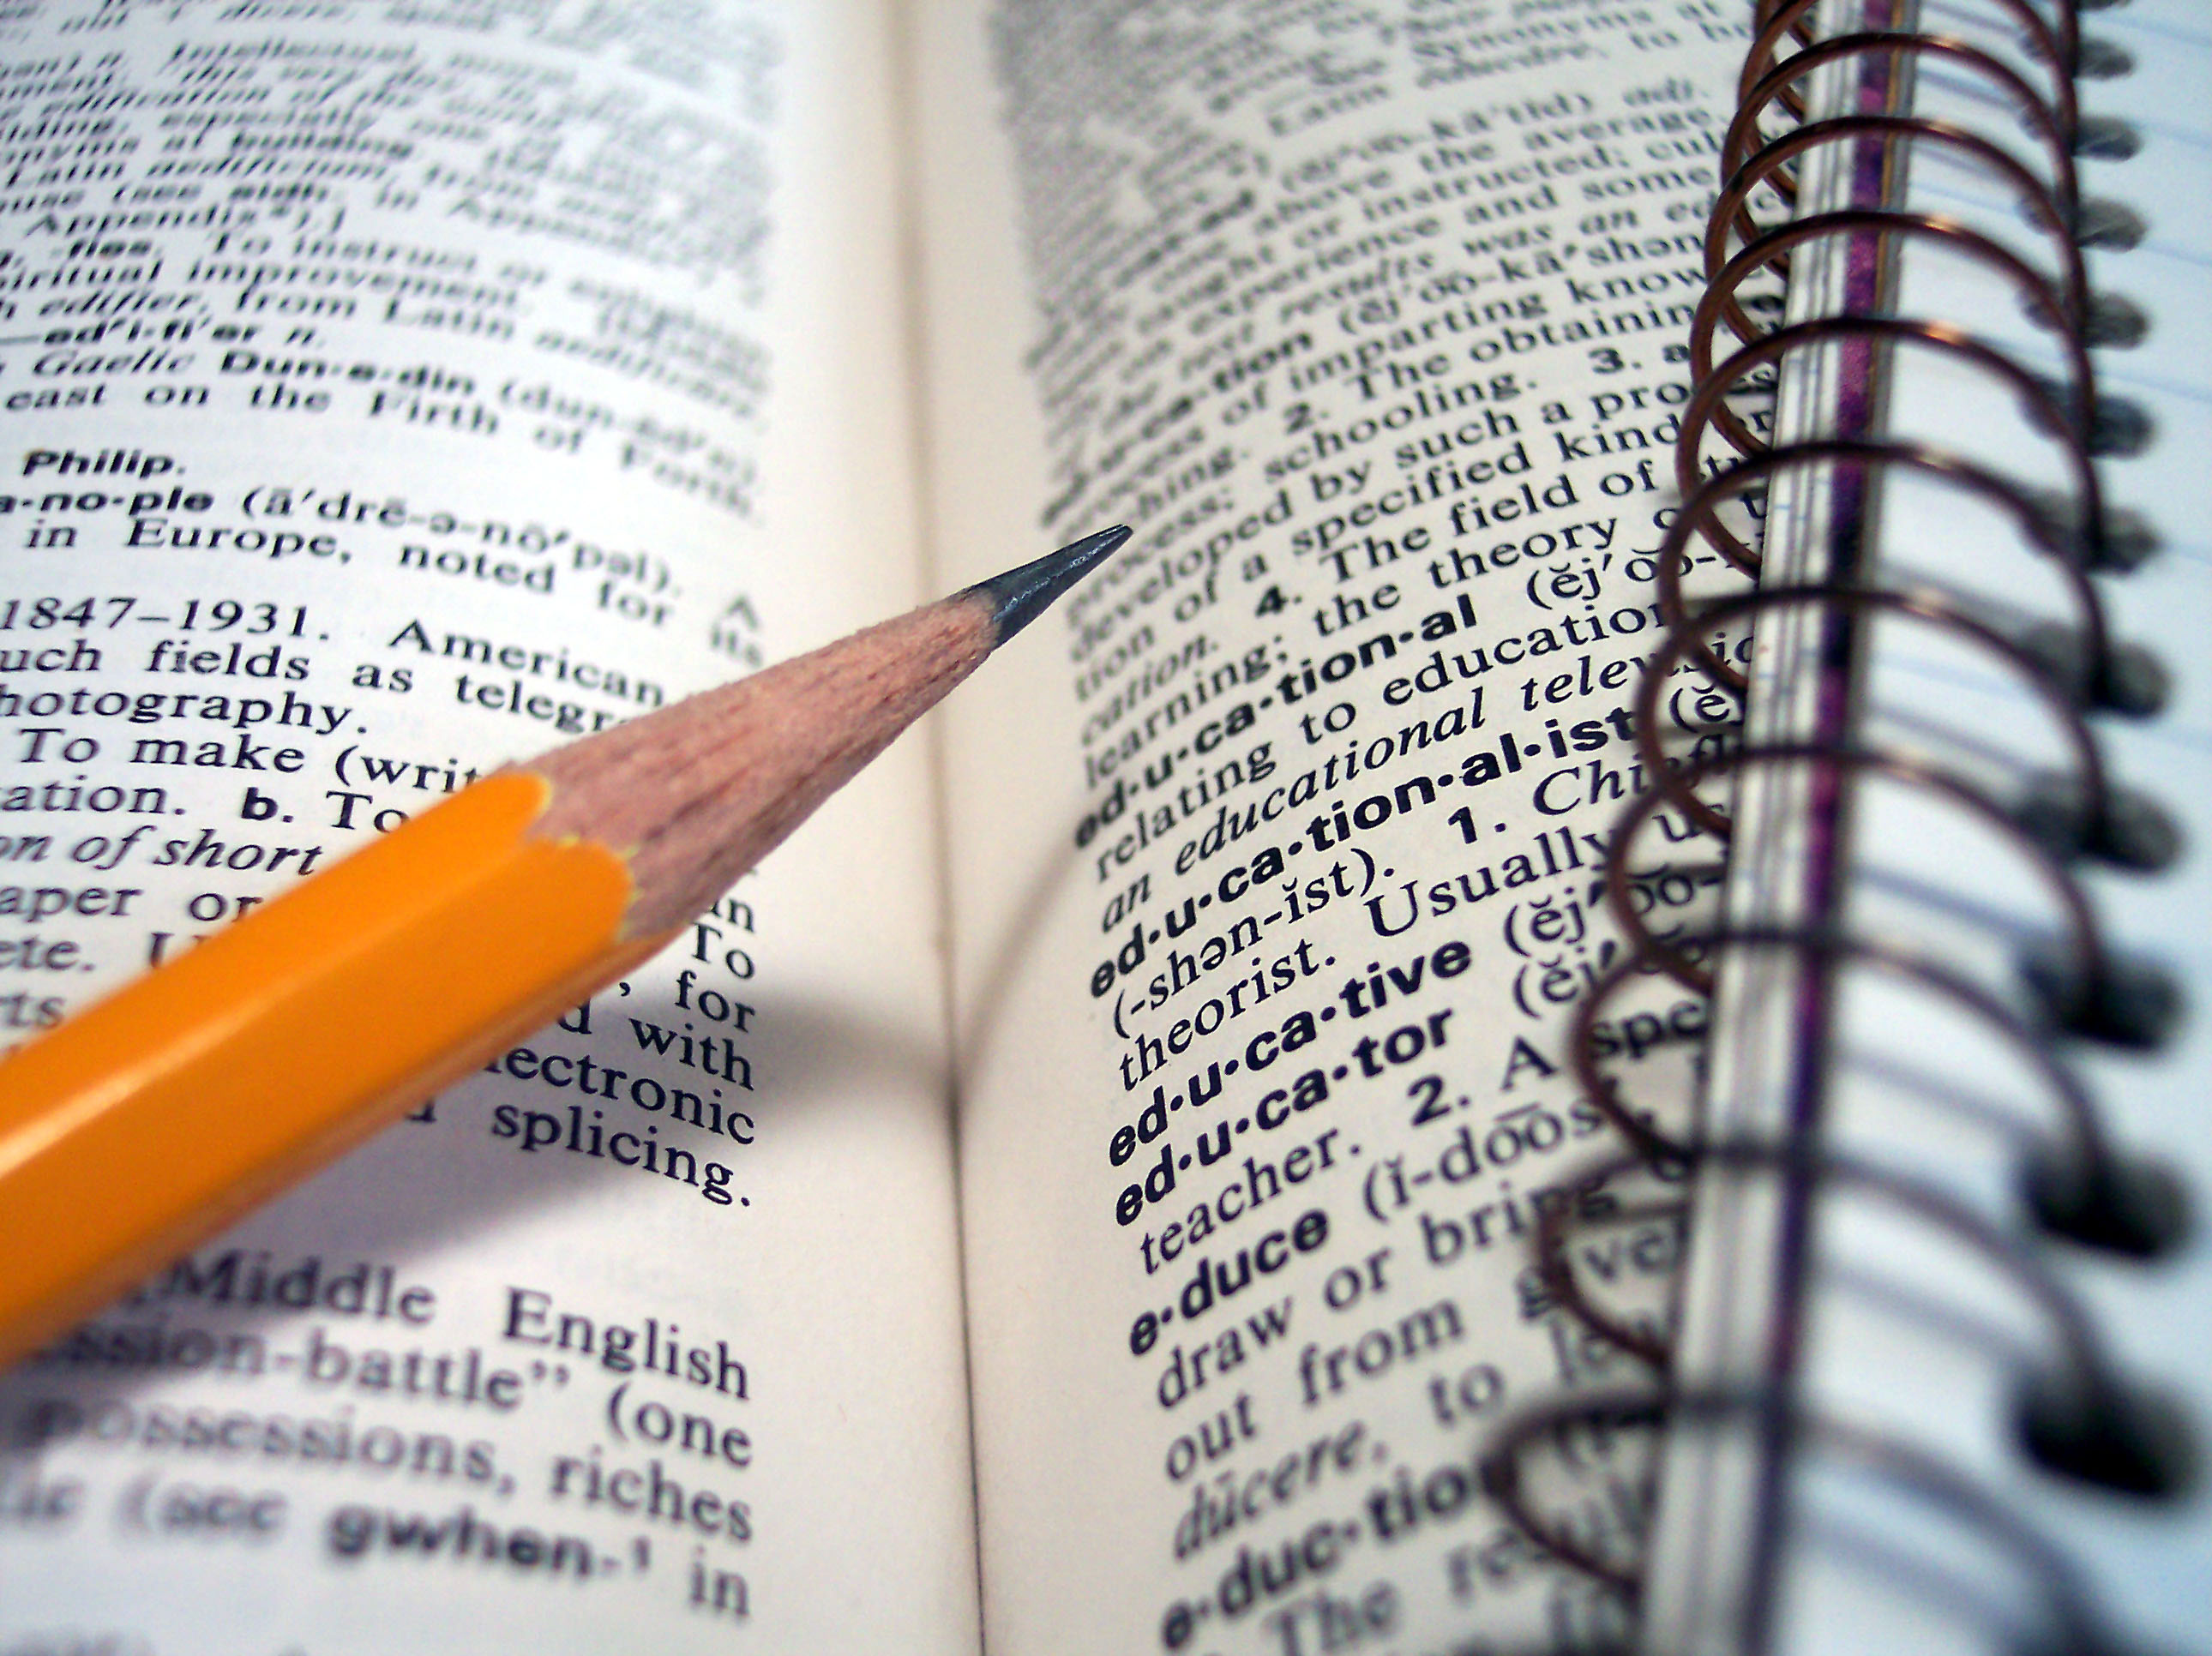

In [4]:
imageIndex = 'random'

colorWheel, imageName = colorWheelGet(imageList,index = imageIndex)
print(imageName)
display(Image.fromarray(colorWheel))

## Choose your symmetry!

In [7]:
numStep = 1000 # number of steps along the two lattice vectors
numCPU = 4 # number of CPUs to use with multiprocessing

#groupType = 'p4g'
groupType = randomGroupGet()
numSampleCoeff = 4
coefficientFunction = exponentialDist(1.0)
nmMagnitudeFunction = geometricDist(.6)

latticeType = latticeTypeFromGroup(groupType)
if latticeType == 'general':
    latticeData = .5 + 1j 
elif latticeType == 'rhombic':
    latticeData = .25
elif latticeType == 'rectangular':
    latticeData = 2
else:
    latticeData = None

myF, lattice_vector_1, lattice_vector_2 = functionAndLatticeGet(latticeType, latticeData)
nmDict = nmDictRandom(groupType, numSampleCoeff, coefficientFunction, nmMagnitudeFunction)

print('Group: ' + groupType)
print('lattice type: ' + latticeType)
print("lattice_vector_1: " + str(lattice_vector_1))
print("lattice_vector_2: " + str(lattice_vector_2))
print("nmDict: " + str(nmDict))

Group: pgg
lattice type: rectangular
lattice_vector_1: 1.0
lattice_vector_2: 2j
nmDict: {(1, 1): (0.3589682329747759+0.09140129279229606j), (-1, -1): (0.3589682329747759+0.09140129279229606j), (1, -1): (0.3589682329747759+0.09140129279229606j), (-1, 1): (0.3589682329747759+0.09140129279229606j), (-6, -6): (-0.14462145220858358+0.005485884088454123j), (6, 6): (-0.14462145220858358+0.005485884088454123j), (-6, 6): (-0.14462145220858358+0.005485884088454123j), (6, -6): (-0.14462145220858358+0.005485884088454123j), (-2, 1): (-0.003018990277463714+0.01773644901863297j), (2, -1): (-0.003018990277463714+0.01773644901863297j), (-2, -1): (0.003018990277463714-0.01773644901863297j), (2, 1): (0.003018990277463714-0.01773644901863297j)}


## Calculate the complex function values on the fundamental cell grid

In [9]:
v = np.linspace(0,1,numStep)

if numStep <=200 or numCPU==1:
    print("computing")
    gridApply = dict([latticeEval((i,x,j,y,myF,nmDict,lattice_vector_1,lattice_vector_2)) for i,x in enumerate(v) for j,y in enumerate(v)])
    print("done computing...")
else:
    pool = Pool(numCPU)
    print("computing...")
    grid = [(i,x,j,y,myF,nmDict,lattice_vector_1,lattice_vector_2) for i,x in enumerate(v) for j,y in enumerate(v)]
    gridApply = dict(pool.map(latticeEval,grid))
    pool.close()
    print ("done computing...")

computing...
done computing...


## Visualize real part of function to detect lack of symmetry and coefficient degeneracies

In [ ]:
fundamentalRealDict = checkSymmetrySimpleReal(gridApply)
fundamentalCellDisplay(fundamentalRealDict, 500,500)

## Visualize imaginary part of function to detect lack of symmetry and coefficient degeneracies

In [ ]:
fundamentalImagDict = checkSymmetrySimpleImag(gridApply)
fundamentalCellDisplay(fundamentalImagDict, 500,500)

## Calculate the colors on the fundamental cell grid using the colorwheel

In [ ]:
fundamentalColorDict = colorwheelApply(gridApply, colorWheel)

## Here is the fundamental cell using Farris' image colorwheel technique

In [ ]:
fundamentalCellDisplay(fundamentalColorDict, 500,500)

## Here is a small piece of the wallpaper pattern

In [ ]:
xmin,xmax = -1,1
ymin,ymax = -1,1
resx, resy = 500,500

imOut = tileFundamental(fundamentalColorDict, 
                            numStep, 
                            lattice_vector_1,
                            lattice_vector_2,
                            xmin=xmin, 
                            xmax=xmax, 
                            ymin=ymin, 
                            ymax=ymax, 
                            resx=resx, 
                            resy=resy)
display(Image.fromarray(imOut))

## Here is the fundamental cell using the alternative visualization technique

In [ ]:
def symmetryFunction0(z):
    realPart = z.real
    imagPart = z.imag
    return np.array((int(realPart) % 256 , 
                     int(realPart * imagPart) % 256, 
                     int(imagPart) % 256), 
                    dtype='uint8')

In [ ]:
#fundamentalSimpleSymDict = checkSymmetrySimple(gridApply)
#fundamentalCellDisplay(fundamentalSimpleSymDict, 500,500)

fundamentalSimpleSymDict = symmetryByFunction(gridApply, symmetryFunction0)
fundamentalCellDisplay(fundamentalSimpleSymDict, 500,500)

## Here is a small piece of the wallpaper pattern using alternative visualization

In [ ]:
imOut1 = tileFundamental(fundamentalSimpleSymDict, 
                            numStep, 
                            lattice_vector_1,
                            lattice_vector_2,
                            xmin=xmin, 
                            xmax=xmax, 
                            ymin=ymin, 
                            ymax=ymax, 
                            resx=resx, 
                            resy=resy)
display(Image.fromarray(imOut1))

## Iterate.  Use the new wallpaper pattern as a colorwheel with the same specs!

In [ ]:
imRecursive = imOut

In [ ]:
fundamentalColorDict2 = colorwheelApply(gridApply, imRecursive)
imRecursive = tileFundamental(fundamentalColorDict2, 
                            numStep, 
                            lattice_vector_1,
                            lattice_vector_2,
                            xmin=xmin, 
                            xmax=xmax, 
                            ymin=ymin, 
                            ymax=ymax, 
                            resx=resx, 
                            resy=resy)
display(Image.fromarray(imRecursive))